# NYC Motor Vehicle Collisions Exploratory Data Analysis and Visualization

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
csv_crashes = 'data/mvc_crashes.csv'

df = pd.read_csv(csv_crashes, low_memory=False)

In [3]:
df.rename(columns=lambda x: x.strip().replace(' ', '_').upper(), inplace=True)
print(df.head())

   CRASH_DATE CRASH_TIME   BOROUGH ZIP_CODE   LATITUDE  LONGITUDE  \
0  09/11/2021       2:39       NaN      NaN        NaN        NaN   
1  03/26/2022      11:45       NaN      NaN        NaN        NaN   
2  06/29/2022       6:55       NaN      NaN        NaN        NaN   
3  09/11/2021       9:35  BROOKLYN    11208  40.667202 -73.866500   
4  12/14/2021       8:13  BROOKLYN    11233  40.683304 -73.917274   

                  LOCATION           ON_STREET_NAME CROSS_STREET_NAME  \
0                      NaN    WHITESTONE EXPRESSWAY         20 AVENUE   
1                      NaN  QUEENSBORO BRIDGE UPPER               NaN   
2                      NaN       THROGS NECK BRIDGE               NaN   
3    (40.667202, -73.8665)                      NaN               NaN   
4  (40.683304, -73.917274)          SARATOGA AVENUE    DECATUR STREET   

           OFF_STREET_NAME  ...  CONTRIBUTING_FACTOR_VEHICLE_2  \
0                      NaN  ...                    Unspecified   
1             

In [4]:
# Ensure the 'CRASH_DATE' column is in datetime format
df['CRASH_DATE'] = pd.to_datetime(df['CRASH_DATE'], errors='coerce')

# Get the first and last CRASH_DATEs
first_day = df['CRASH_DATE'].min()
last_day = df['CRASH_DATE'].max()

# Format the dates
first_day_formatted = first_day.strftime('%m/%d/%Y')
last_day_formatted = last_day.strftime('%m/%d/%Y')
total_crashes = len(df)

print(f"First Day: {first_day_formatted}")
print(f"Last Day: {last_day_formatted}")
print(f"Total number of crashes: {total_crashes}")

First Day: 07/01/2012
Last Day: 01/20/2025
Total number of crashes: 2150966


In [5]:
sns.set_theme(style="dark")
sns.set_palette("deep")
sns.set_context("notebook")

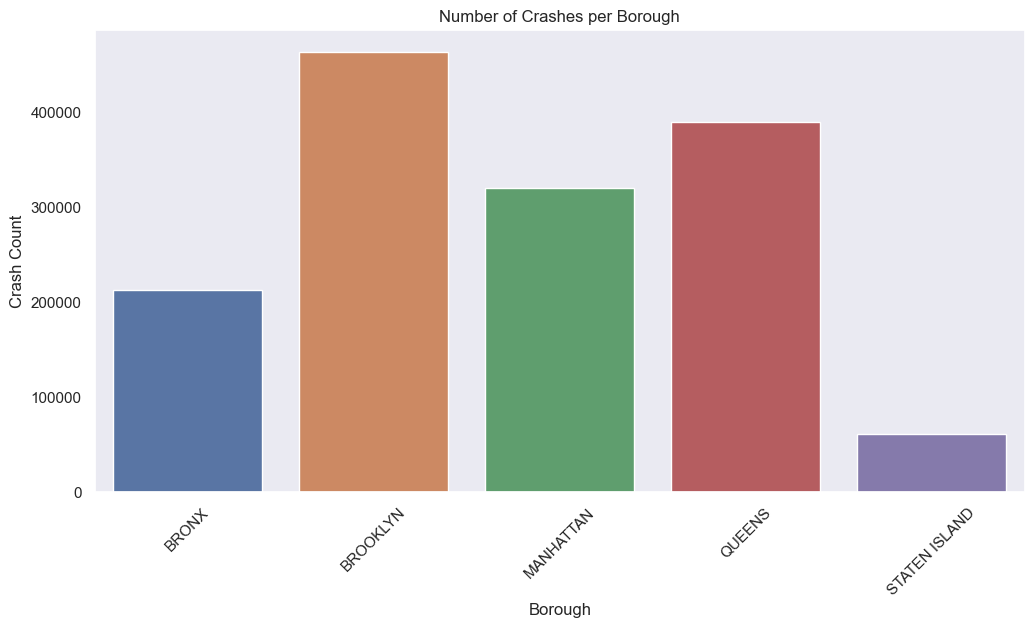

In [56]:
df_borough = df.groupby('BOROUGH').size().reset_index(name='CRASH_COUNT')

plt.figure(figsize=(12, 6))
sns.barplot(data=df_borough,x='BOROUGH',y='CRASH_COUNT',hue='BOROUGH')
plt.legend([], [], frameon=False)  # Remove the legend if unnecessary
plt.title('Number of Crashes per Borough')
plt.xlabel('Borough')
plt.ylabel('Crash Count')
plt.xticks(rotation=45)
plt.show()

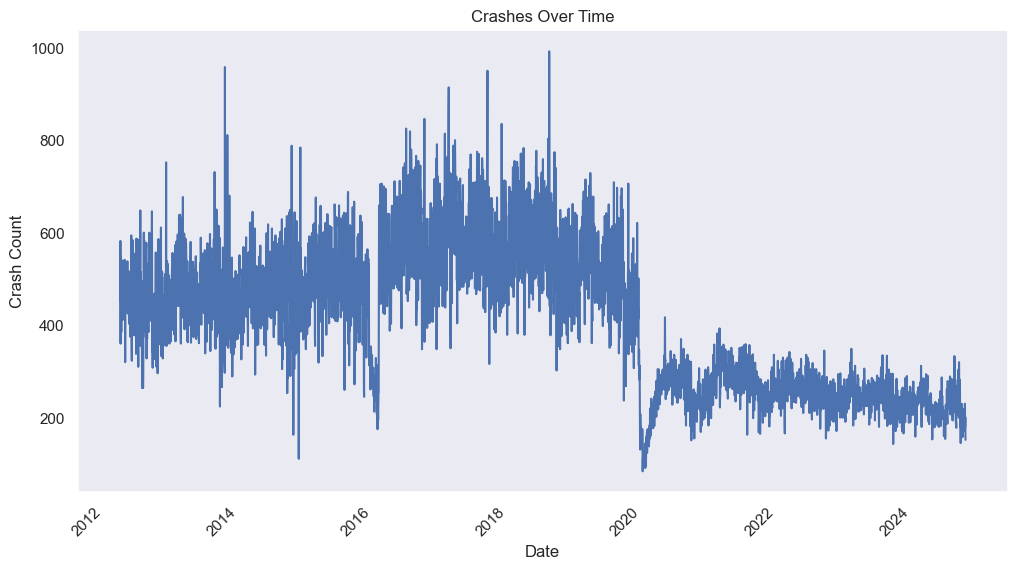

In [57]:
# Count the number of crashes per day
df['CRASH_DATE'] = pd.to_datetime(df['CRASH_DATE'])
df_daily = df.groupby(df['CRASH_DATE']).size().reset_index(name='CRASH_COUNT')


# Plot crashes over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='CRASH_DATE', y='CRASH_COUNT', data=df_daily)
plt.title('Crashes Over Time')
plt.xlabel('Date')
plt.ylabel('Crash Count')
plt.xticks(rotation=45)
plt.show()

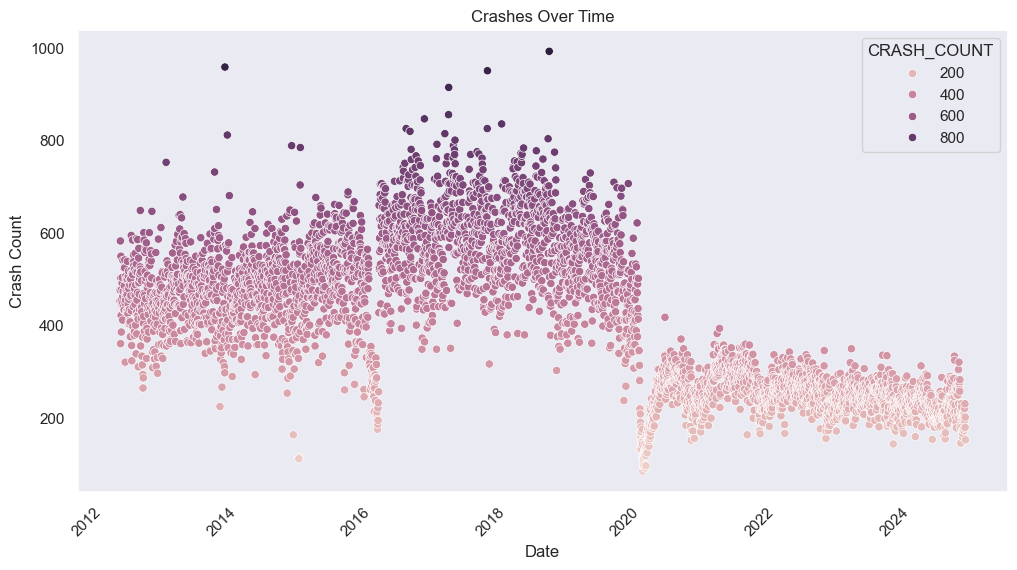

In [58]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='CRASH_DATE', y='CRASH_COUNT', data=df_daily, hue='CRASH_COUNT')
plt.title('Crashes Over Time')
plt.xlabel('Date')
plt.ylabel('Crash Count')
plt.xticks(rotation=45)
plt.show()

In [10]:

# Convert 'CRASH_DATE' to datetime format
df['CRASH_DATE'] = pd.to_datetime(df['CRASH_DATE'], format='%m/%d/%Y')

# Convert 'CRASH_TIME' to datetime and combine with 'CRASH_DATE' for full datetime
df['CRASH_DATETIME'] = pd.to_datetime(df['CRASH_DATE'].astype(str) + ' ' + df['CRASH_TIME'], format='%Y-%m-%d %H:%M')

# Group by Year
df['YEAR'] = df['CRASH_DATE'].dt.year
df_year = df.groupby('YEAR').size().reset_index(name='CRASH_COUNT')


# Group by Month
df['MONTH'] = df['CRASH_DATE'].dt.month
df_month = df.groupby('MONTH').size().reset_index(name='CRASH_COUNT')


# Group by Hour
df['HOUR'] = df['CRASH_DATETIME'].dt.hour
df_hour = df.groupby('HOUR').size().reset_index(name='CRASH_COUNT')



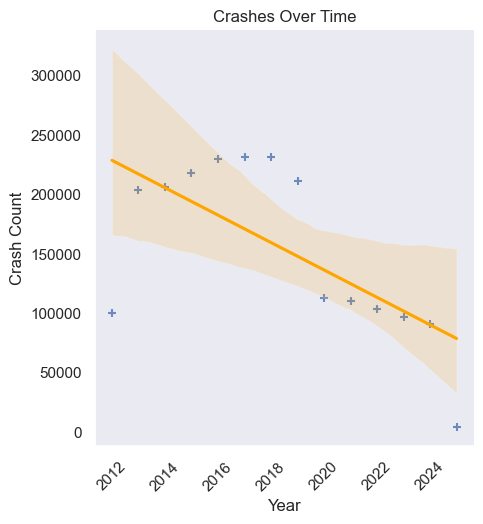

In [59]:
sns.lmplot(data=df_year,x='YEAR',y='CRASH_COUNT',markers="+",line_kws={'color': 'orange'})
plt.title('Crashes Over Time')
plt.xlabel('Year')
plt.ylabel('Crash Count')
plt.xticks(rotation=45)
plt.show()

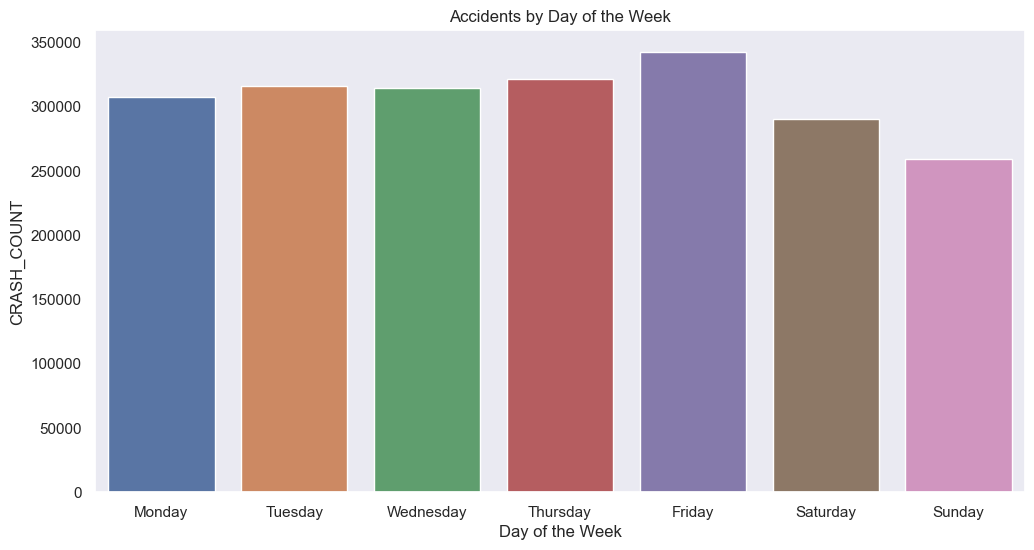

In [12]:
df['WEEKDAY'] = df['CRASH_DATE'].dt.weekday
# Map numeric weekdays to their names
weekday_map = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 
               4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df['WEEKDAY'] = df['WEEKDAY'].map(weekday_map)

df_weekday = df.groupby('WEEKDAY').size().reset_index(name='CRASH_COUNT')

weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sorted_df_weekday = df_weekday.copy()
sorted_df_weekday['WEEKDAY'] = pd.Categorical(sorted_df_weekday['WEEKDAY'], categories=weekday_order, ordered=True)
sorted_df_weekday = sorted_df_weekday.sort_values('WEEKDAY')
df_weekday = sorted_df_weekday

plt.figure(figsize=(12, 6))
sns.barplot(data=df_weekday,x='WEEKDAY',y='CRASH_COUNT',hue='WEEKDAY')
plt.title("Accidents by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("CRASH_COUNT")
plt.show()

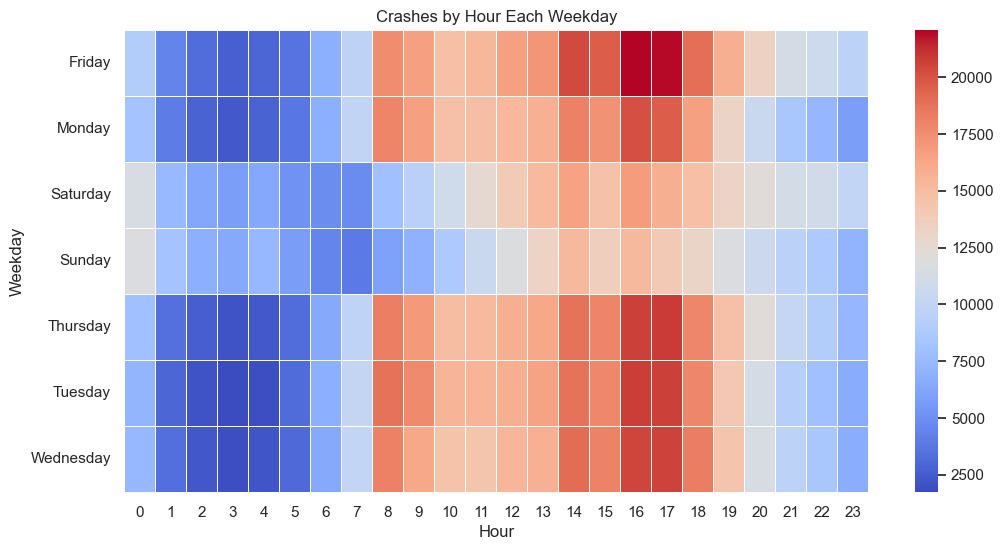

In [55]:
heatmap_data = df.groupby(['WEEKDAY', 'HOUR']).size().unstack()

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=False, cmap='coolwarm',cbar=True, linewidths=0.5)
plt.title('Crashes by Hour Each Weekday')
plt.xlabel('Hour')
plt.ylabel('Weekday')
plt.show()

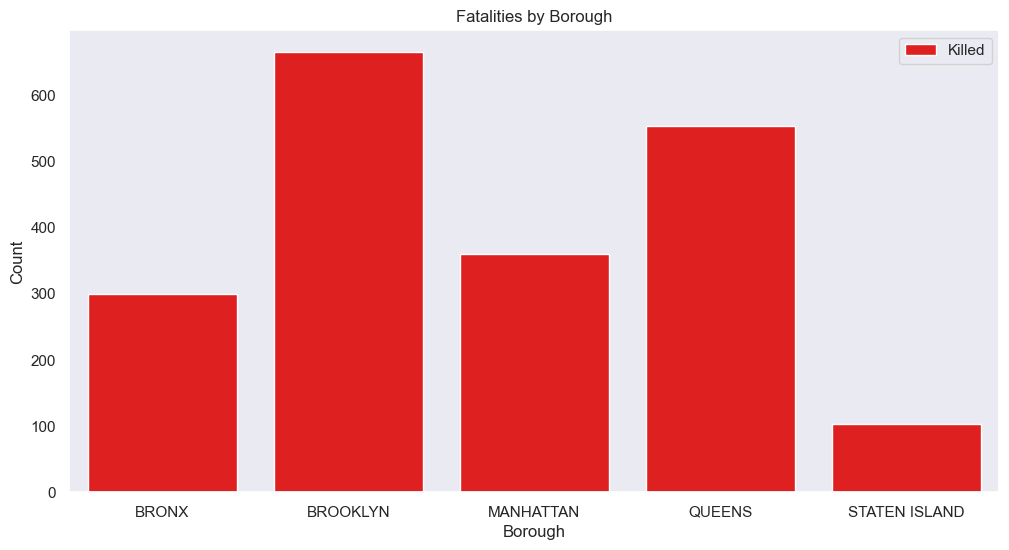

In [14]:
borough_injury_fatality = df.groupby('BOROUGH')[['NUMBER_OF_PERSONS_INJURED', 'NUMBER_OF_PERSONS_KILLED']].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='BOROUGH', y='NUMBER_OF_PERSONS_KILLED', data=borough_injury_fatality, color='red', label='Killed')
plt.title('Fatalities by Borough')
plt.xlabel('Borough')
plt.ylabel('Count')
plt.legend()
plt.show()

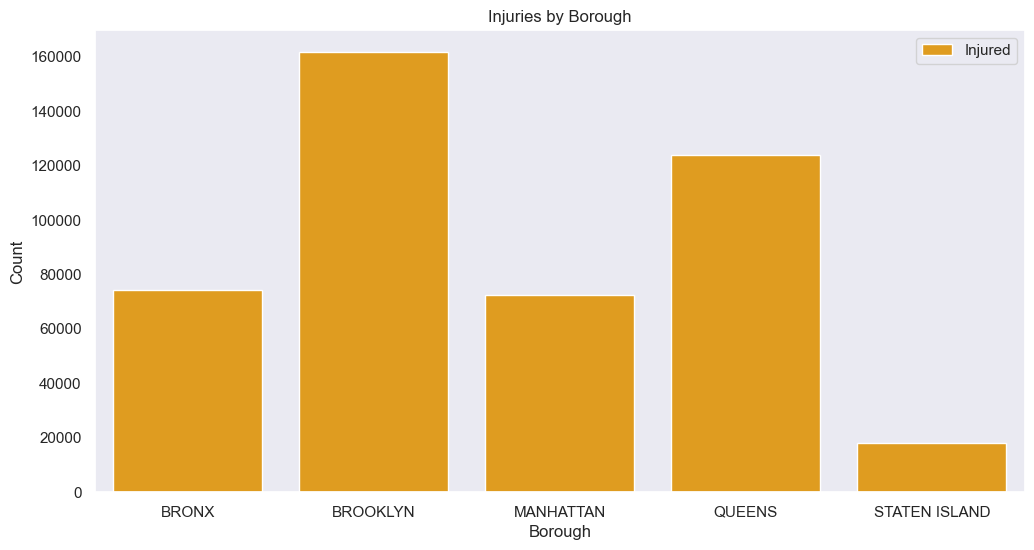

In [15]:
plt.figure(figsize=(12, 6))
sns.barplot(x='BOROUGH', y='NUMBER_OF_PERSONS_INJURED', data=borough_injury_fatality, color='orange', label='Injured')
plt.title('Injuries by Borough')
plt.xlabel('Borough')
plt.ylabel('Count')
plt.legend()
plt.show()

In [16]:
# data preprocessing
# Convert CRASH_DATE to datetime
df['CRASH_DATE'] = pd.to_datetime(df['CRASH_DATE'], format='%m/%d/%Y')

# Extract hour from CRASH_TIME
df['CRASH_HOUR'] = pd.to_datetime(df['CRASH_TIME'], format='%H:%M').dt.hour

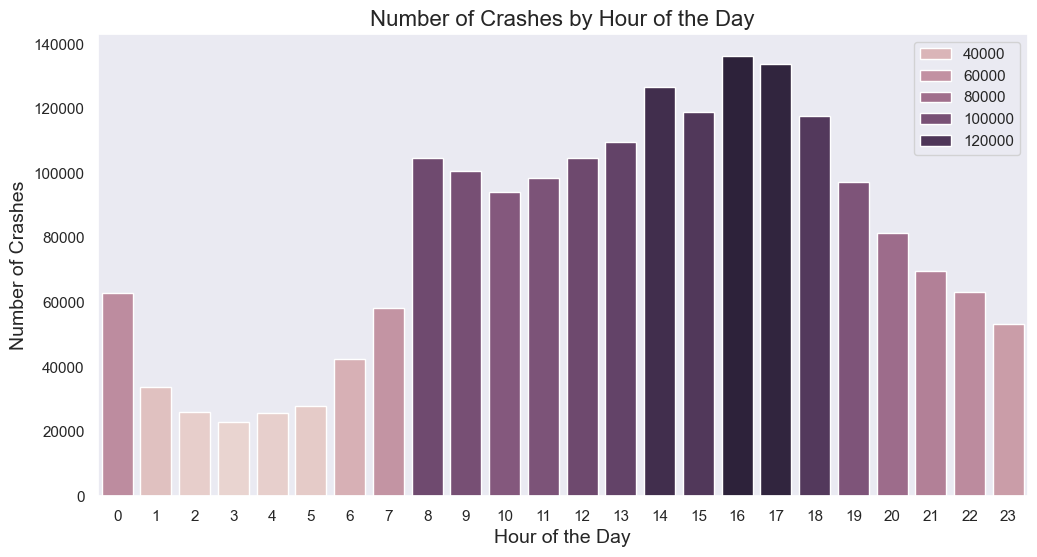

In [17]:
# Group by hour and count crashes
crashes_by_hour = df['CRASH_HOUR'].value_counts().sort_index()

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=crashes_by_hour.index, y=crashes_by_hour.values, hue=crashes_by_hour.values)
plt.title('Number of Crashes by Hour of the Day', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Number of Crashes', fontsize=14)
plt.xticks(range(24))
plt.show()

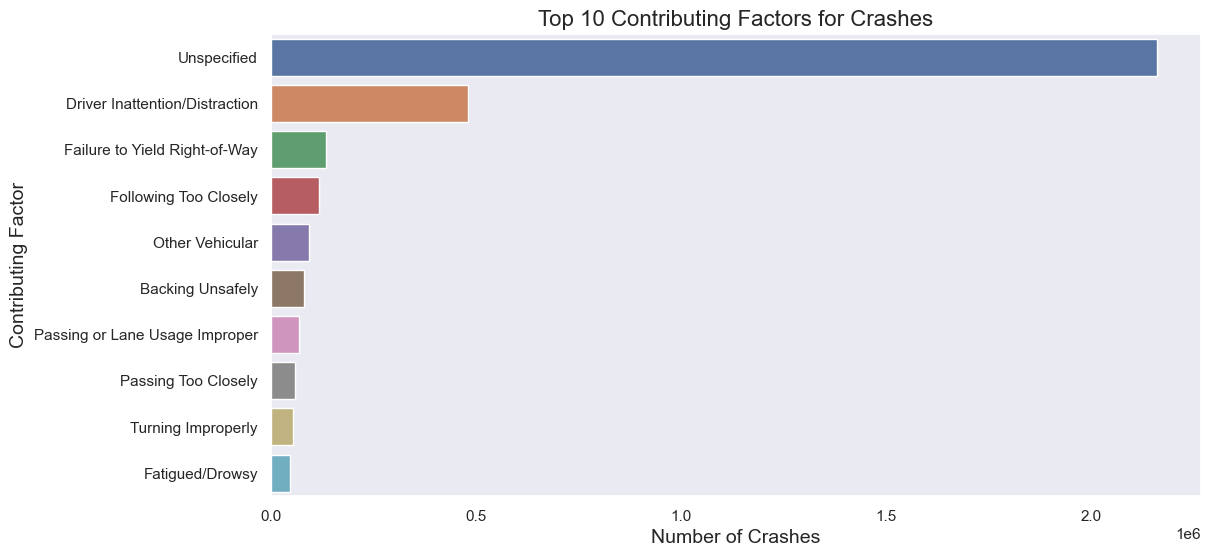

In [19]:
# Combine all contributing factor columns into one series
contributing_factors = pd.concat([
    df['CONTRIBUTING_FACTOR_VEHICLE_1'],
    df['CONTRIBUTING_FACTOR_VEHICLE_2'],
    df['CONTRIBUTING_FACTOR_VEHICLE_3'],
    df['CONTRIBUTING_FACTOR_VEHICLE_4'],
    df['CONTRIBUTING_FACTOR_VEHICLE_5']
]).dropna()

# Get top 10 contributing factors
top_factors = contributing_factors.value_counts().nlargest(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_factors.values, y=top_factors.index, hue=top_factors.index)
plt.title('Top 10 Contributing Factors for Crashes', fontsize=16)
plt.xlabel('Number of Crashes', fontsize=14)
plt.ylabel('Contributing Factor', fontsize=14)
plt.show()

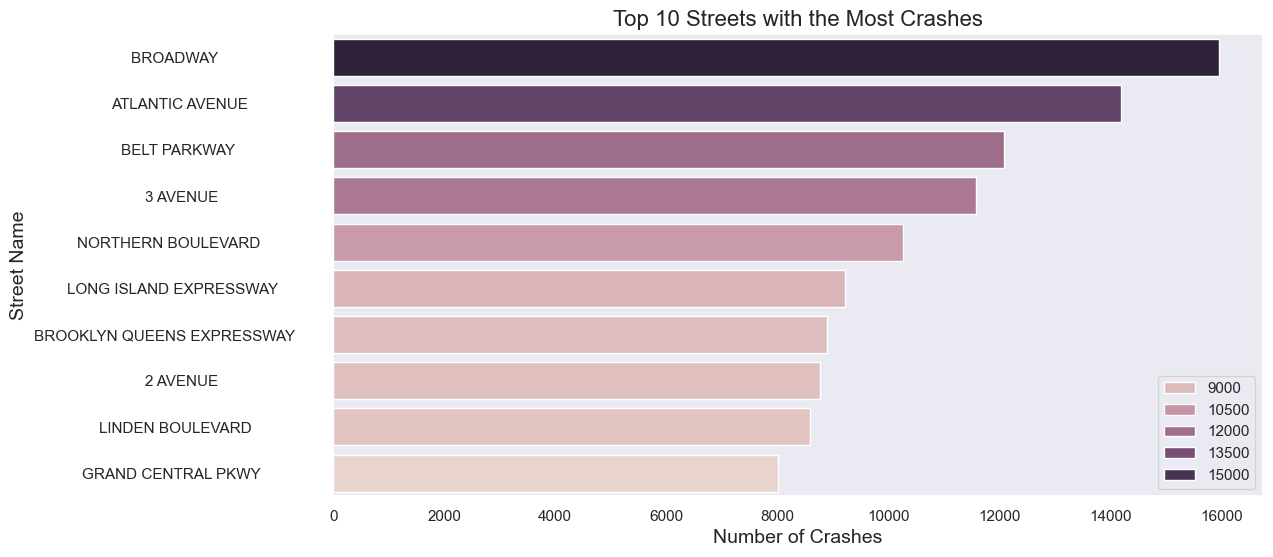

In [21]:
# Combine ON_STREET_NAME and OFF_STREET_NAME
streets = pd.concat([df['ON_STREET_NAME'], df['OFF_STREET_NAME']]).dropna()

# Get the top 10 streets with the most crashes
top_streets = streets.value_counts().nlargest(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_streets.values, y=top_streets.index, hue=top_streets.values)
plt.title('Top 10 Streets with the Most Crashes', fontsize=16)
plt.xlabel('Number of Crashes', fontsize=14)
plt.ylabel('Street Name', fontsize=14)
plt.show()

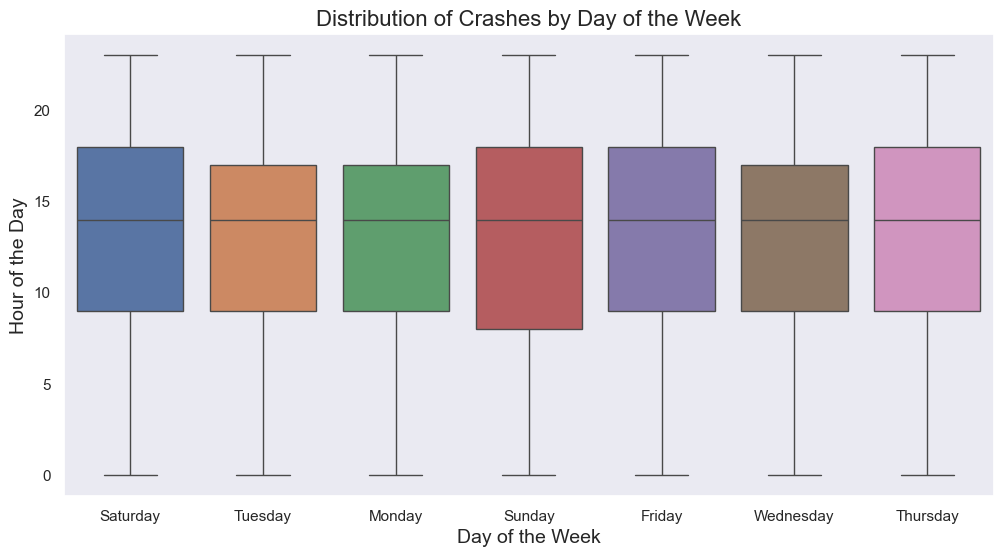

In [26]:
# Extract day of the week
df['DAY_OF_WEEK'] = df['CRASH_DATE'].dt.day_name()

# Plot
plt.figure(figsize=(12, 6))
sns.boxplot(x='DAY_OF_WEEK', y='CRASH_HOUR', data=df, hue='DAY_OF_WEEK')
plt.title('Distribution of Crashes by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=14)
plt.ylabel('Hour of the Day', fontsize=14)
plt.show()